# Normal level

## Normal:

### Найдите все неподвижные точки логистического отображения

Неподвижная точка $x^*$ удовлетворяет уравнению $x^* = f(x^*)$. Для $f(x) = rx(1-x)$:
$$ x^* = r x^* (1 - x^*) $$
$$ x^* \Big( r(1-x^*) - 1 \Big) = 0 $$
Решения:
1.  $x_1^* = 0$.
2.  $x_2^* = 1 - \frac{1}{r}$.

### При каких r отображение имеет одну неподвижную точку? Несколько?

*   При $r \in [0, 1]$, в интервале [0, 1] одна неподвижная точка: $x_1^*=0$.
*   При $r > 1$, две неподвижные точки: $x_1^*=0$ и $x_2^*=1-1/r$.

### Какое максимальное количество неподвижных точек может иметь логистическое отображение? Почему?

Уравнение $x^* = r x^* (1 - x^*)$ - квадратное. У него не может быть более двух корней.

Построим графики $y=f(x)$ и $y=x$. Точки их пересечения - это неподвижные точки.

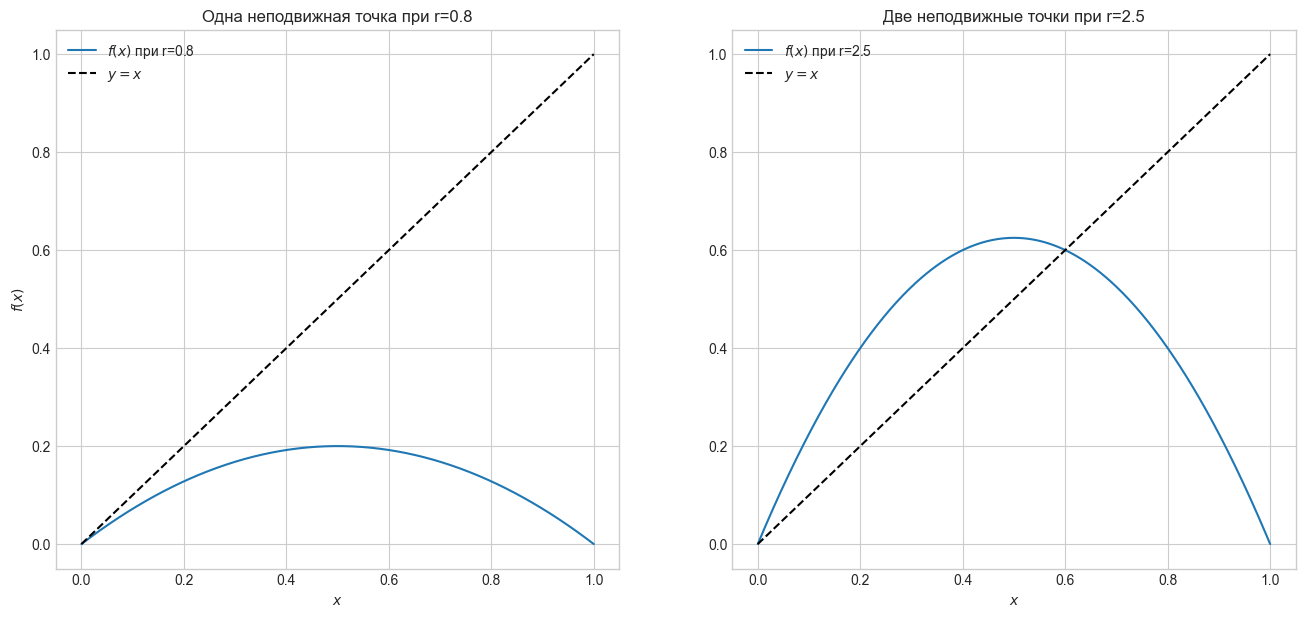

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
x = np.linspace(0, 1, 400)
y_line = x

r1 = 0.8
ax1.plot(x, r1 * x * (1 - x), label=f'$f(x)$ при r={r1}')
ax1.plot(x, y_line, label='$y=x$', linestyle='--', color='k')
ax1.set_title(f'Одна неподвижная точка при r={r1}')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$f(x)$'); ax1.legend(); ax1.grid(True)

r2 = 2.5
ax2.plot(x, r2 * x * (1 - x), label=f'$f(x)$ при r={r2}')
ax2.plot(x, y_line, label='$y=x$', linestyle='--', color='k')
ax2.set_title(f'Две неподвижные точки при r={r2}')
ax2.set_xlabel('$x$'); ax2.legend(); ax2.grid(True)

plt.show()

## Normal:

### Докажите, что при x0 ∈ (0; 1) и r ∈ (0; 1] последовательность {xn}, заданная логистическим отображением, монотонно убывает
Нужно доказать $x_{n+1} \le x_n$, то есть $r(1-x_n) \le 1$.
Это верно, т.к. $r \le 1$ и $1-x_n < 1$.

### Существует ли предел у данной последовательности при r ∈ (0; 1]? Докажите.
По теореме Вейерштрасса, последовательность монотонна и ограничена, значит, предел существует. Он должен быть неподвижной точкой. При $r \in (0,1]$ единственная подходящая точка - это 0. Вывод: $\lim_{n \to \infty} x_n = 0$.

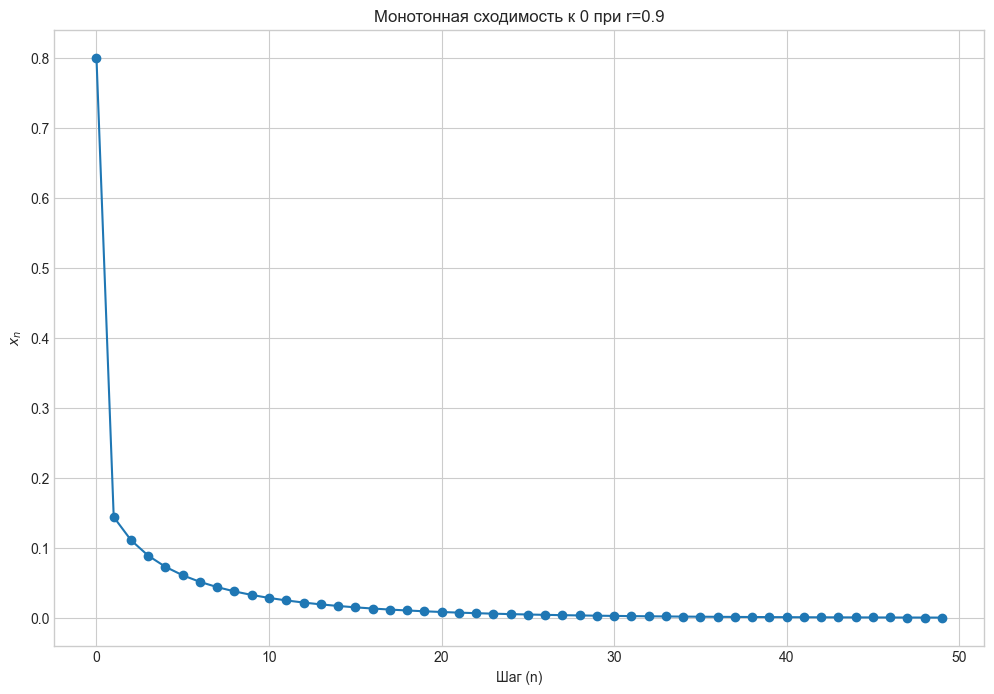

In [5]:
def generate_sequence(x0, r, num_steps):
    x_seq = [x0]
    x = x0
    for _ in range(num_steps - 1):
        x = r * x * (1 - x)
        x_seq.append(x)
    return x_seq

seq = generate_sequence(x0=0.8, r=0.9, num_steps=50)
plt.figure(figsize=(12, 8))
plt.plot(seq, 'o-')
plt.title('Монотонная сходимость к 0 при r=0.9'); plt.xlabel('Шаг (n)'); plt.ylabel('$x_n$'); plt.grid(True)
plt.show()

# Normal

## Пусть $r ∈ (2; 3), x_{2n} > x^*, x_{2n+1} < x^*$. Что вы можете сказать о монотонности подпоследовательностей ${x_{2n}}, {x_{2n+1}}$? Докажите. Проверьте графически.

## Дано:
1.   $f(x) = rx(1-x)$ с $r \in (2, 3)$.
2.  Ненулевая неподвижная точка $x^* = 1 - 1/r$.
3.  Для всех $n$ выполняется: $x_{2n} > x^*$ и $x_{2n+1} < x^*$.

---

### Доказательство монотонности

1.  Рассмотрим двойное отображение $f^2(x) = f(f(x))$. Это функция, которая показывает, куда мы попадем через два шага:
    $$
    x_{n+2} = f(x_{n+1}) = f(f(x_n)) = f^2(x_n)
    $$
    Это означает, что подпоследовательность $\{x_{2n}\}$ (то есть $x_0, x_2, x_4, \dots$) является результатом последовательного применения функции $f^2(x)$ к $x_0$. Аналогично для $\{x_{2n+1}\}$ и $x_1$.

2.  Проанализируем поведение $f^2(x)$ вблизи $x^*$. Для этого нам нужно посмотреть на её производную. По правилу дифференцирования сложной функции:
    $$
    (f^2)'(x) = f'(f(x)) \cdot f'(x)
    $$
    Нас интересует значение в неподвижной точке $x^*$:
    $$
    (f^2)'(x^*) = f'(f(x^*)) \cdot f'(x^*) = f'(x^*) \cdot f'(x^*) = [f'(x^*)]^2
    $$

3.  Вычислим $f'(x^*)$:
    $$
    f'(x) = (rx-rx^2)' = r - 2rx
    $$
    $$
    f'(x^*) = r - 2rx^* = r - 2r(1 - 1/r) = r - 2(r-1) = 2-r
    $$

4.  Сделаем ключевой вывод о $(f^2)'(x^*)$:
    $$
    (f^2)'(x^*) = (2-r)^2
    $$
    Поскольку по условию $r \in (2, 3)$, то $(2-r)$ находится в интервале $(-1, 0)$. Возводя в квадрат, мы получаем, что $0 < (2-r)^2 < 1$.
    Итак, мы получили, что $0 < (f^2)'(x^*) < 1$.
    *   Положительная производная означает, что функция $f^2(x)$ локально возрастает в окрестности $x^*$.
    *   Производная меньше 1 означает, что она является сжимающим отображением, то есть притягивает точки к $x^*$.

5.  Применим этот вывод к нашим подпоследовательностям.

    *   Для $\{x_{2n}\}$: Нам дано, что $x_{2n} > x^*$.
        Поскольку $f^2(x)$ локально возрастает, то $f^2(x_{2n}) > f^2(x^*)$. А так как $x^*$ — неподвижная точка и для $f^2$ (т.е. $f^2(x^*) = x^*$), то $x_{2n+2} > x^*$. Все четные члены остаются выше $x^*$.
        Поскольку $f^2(x)$ — сжимающее отображение, расстояние до $x^*$ уменьшается. Это значит, что $x_{2n+2} < x_{2n}$.
        Вывод: Подпоследовательность $\{x_{2n}\}$ монотонно убывает, стремясь к $x^*$.

    *   Для $\{x_{2n+1}\}$: Нам дано, что $x_{2n+1} < x^*$.
        Аналогично, из-за возрастания $f^2(x)$ получаем $x_{2n+3} < x^*$.
        Из-за сжимающего свойства расстояние до $x^*$ сокращается, поэтому $x_{2n+3} > x_{2n+1}$.
        Вывод: Подпоследовательность $\{x_{2n+1}\}$ монотонно возрастает, стремясь к $x^*$.

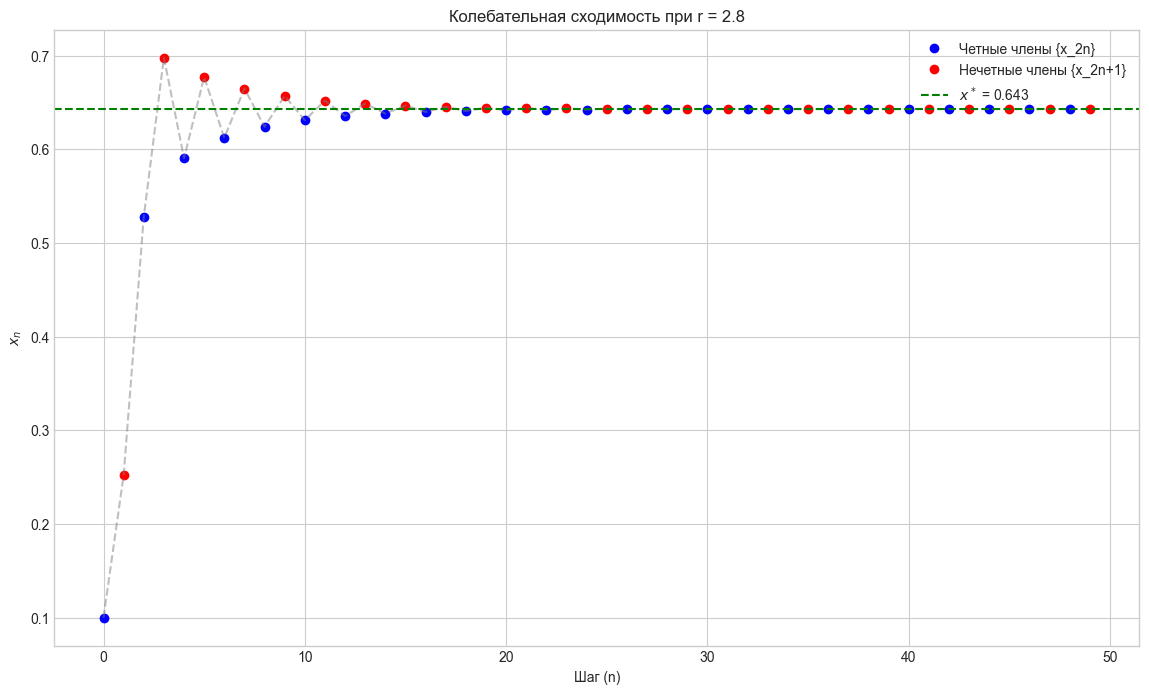

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

def generate_sequence(x0, r, num_steps):
    x_seq = [x0]
    x = x0
    for _ in range(num_steps - 1):
        x = r * x * (1 - x)
        x_seq.append(x)
    return np.array(x_seq)

r_osc = 2.8
x_star = 1 - 1/r_osc
seq = generate_sequence(x0=0.1, r=r_osc, num_steps=50)

n = np.arange(len(seq))
even_indices = n[n % 2 == 0]
odd_indices = n[n % 2 != 0]

plt.figure(figsize=(14, 8))
plt.plot(even_indices, seq[even_indices], 'o', label='Четные члены {x_2n}', color='blue')
plt.plot(odd_indices, seq[odd_indices], 'o', label='Нечетные члены {x_2n+1}', color='red')

plt.plot(n, seq, '--', color='gray', alpha=0.5) # соединю все точки
plt.axhline(x_star, linestyle='--', color='green', label=f'$x^*$ = {x_star:.3f}') # неподвижная точка

plt.title(f'Колебательная сходимость при r = {r_osc}')
plt.xlabel('Шаг (n)'); plt.ylabel('$x_n$'); plt.legend(); plt.grid(True)
plt.show()

# Normal:
## Для отображения g(xn), заданного вариантом:
функция: $g(x_n) = r x_n (1-x_n)^2$.

### 1. Аналитически найдите неподвижную точку.
$x^* = r x^* (1-x^*)^2 \implies x^*=0$

### 2. Найдите или оцените диапазон параметра r, при котором последовательность монотонно сходится к нулю.

Условие $x_{n+1} \le x_n$ приводит к $r(1-x_n)^2 \le 1$. Это выполняется для всех $x_n$, если $r \le 1$.

### 3. Постройте графики зависимости $x_{n}$ от n для нескольких различных значений параметра r.

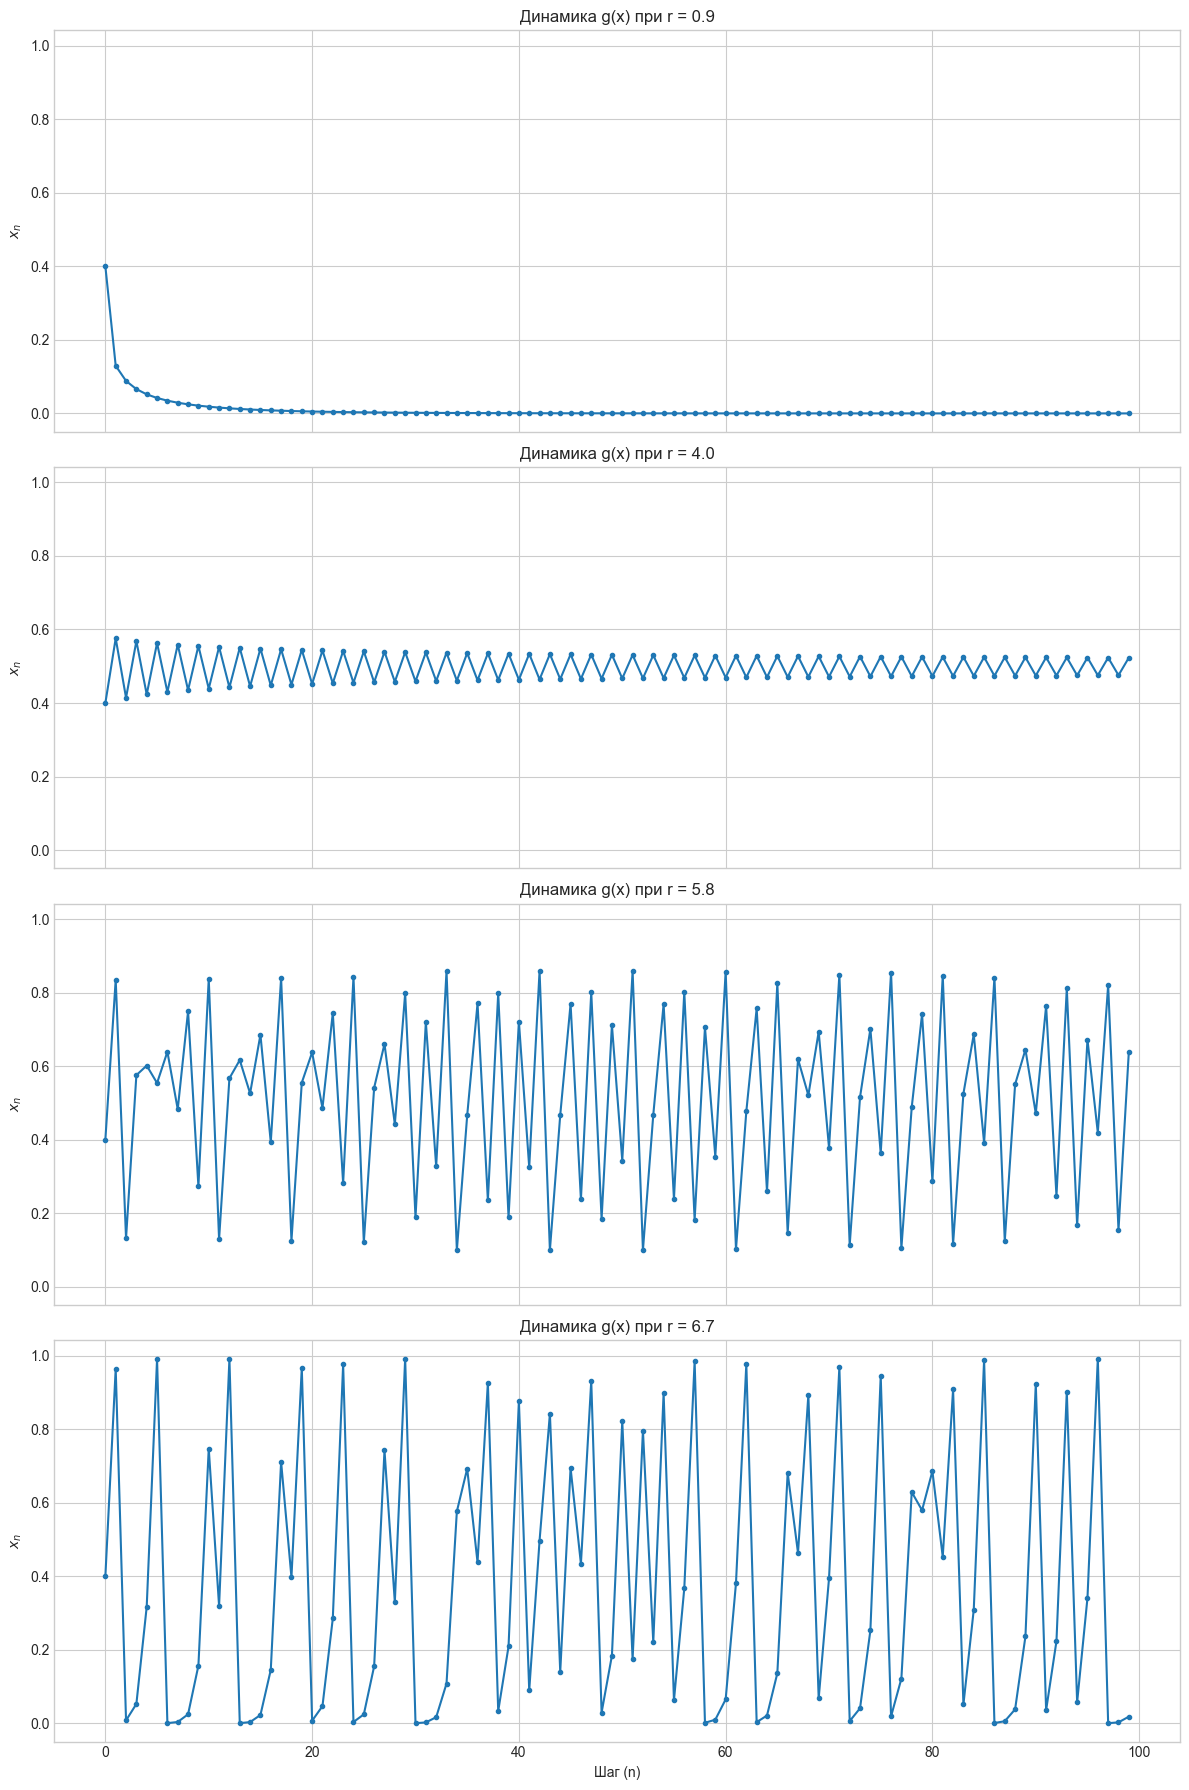

In [7]:
def generate_sequence_variant(x0, r, num_steps):
    x_seq = [x0]
    x = x0
    for _ in range(num_steps - 1):
        x = r * x * (1 - x)**2
        x_seq.append(x)
    return x_seq

r_values_to_test = [0.9, 4.0, 5.8, 6.7]
fig, axes = plt.subplots(len(r_values_to_test), 1, figsize=(12, 18), sharex=True, sharey=True)

for i, r_val in enumerate(r_values_to_test):
    seq = generate_sequence_variant(x0=0.4, r=r_val, num_steps=100)
    axes[i].plot(seq, '.-')
    axes[i].set_title(f'Динамика g(x) при r = {r_val}')
    axes[i].set_ylabel('$x_n$')
    axes[i].grid(True)

plt.xlabel('Шаг (n)'); plt.tight_layout(); plt.show()